Made by: Marshellon Martinus

![title](world-CO2-emission-vs-GDP.png)

source: https://www.cartoskill.com/static/world-CO2-emission-vs-GDP/ 

# The correlation between gross national product (GNP) per capita and CO2 emissions per country.

The gross nationale product(GNP) per capital. Source: https://www.kaggle.com/datasets/ammon1/demographic?resource=download

CO2 emmission per capital from 2002-2018. Source: https://www.kaggle.com/datasets/thedevastator/global-fossil-co2-emissions-by-country-2002-2022


### Introduction

The gross national product, or GNP, is an estimate of the total value of all final products and services produced in a given period by the means of production owned by the residents of a country.  The  GNP is typically calculated by adding personal consumption expenditures, private domestic investment, government spending, net exports, and any income earned by residents from overseas investments, then subtracting income earned by foreign residents. A country's GDP strongly correlates with its wealth. The wealthier a country the higher its GNP. Countries gradually increased their GDP. The assumption is that this came at a cost in terms of CO2 emissions. This means that countries are emitting more CO2 while producing. Through the assumption discribed earlier The research question arose: 

`Is the gross national product (GNP) correlated with the CO2 emmission?` 
Two data sets were downloaded to answer the research question. One dataset contains the CO2 emmission data from 2002 to 2018. The second dataset contains the GNP per country. By combining the two datasets and extracting the most recent year, we can run a regression to see if GNP and CO2 emissions are related.

It is expected that if a country has a high GNP, its emissions will be high as well.
This assumption is based on the previously explained method of calculating GNP. To achieve a high GNP, a country should produce and sell more goods. This all contribute in a high emission of CO2



---

# About the data
#### CO2 dataset: 

Contains the CO2 emission data from diffent country's (EAST ASIA & PACIFIC or ARAB WORLD). Measured from 2002 to 2018 in g/km

#### GNP dataset:  

The first two columns contain the date in dollars and the countries.
In World Band countries are also some groups of coutries like "'EAST ASIA & PACIFIC'" or "ARAB WORLD".  
Other columns include demographic information such as GNP per capita, population, and so on.
The data ranges from 1960 to 2018.
Many data points are blank because some "countries" are not real countries and have no data, while others have no data for several years. 




#### Loading the data

In [3]:
import pandas as pd #for dataframe handeling
import numpy as np # for interpolation purpose
import matplotlib.pyplot as plt
import Summary_functions_and_code_clean_v12 as sf
import seaborn as sn
import yaml # for the loading of the config file


with  open("config.yml") as file:
    input_files = yaml.safe_load(file) #loading the file config file 
    emmission = pd.read_csv(input_files["emmission"]) # selecting the files that are needed
    
    gnp = pd.read_csv(input_files["gnp"])


gnp.head()# checking that the files are correctly loaded in
emmission.head()


,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


_____

#### quality checks and correction

Because we want to know if GNP is related to CO2 emissions, we only want the most recent year from the datasets after merging.
However, before we begin the merging process, we must ensure that the country names are spelled correctly.
The country names in the emission data set uses capital letters, which will be converted to lower case letters like the country names in the co2 dataset. 

We also want to make sure that the variables we intend to use are of the correct data type.
As a result, both GNP and emission should be of the float data type.
The country name should be of the string/object data type, and the years should be of the integer data type. 


In [20]:
gnp["country"] = gnp["country"].str.lower() # transforming the country names to lower and saving it in the country column
emmission["Country"] = emmission["Country"].str.lower() # transforming the country names to lower and saving it in the country column

country_amount_gnp = gnp["country"].unique()# this is the amount of country's whitin in the GNP dataframe
country_amount_emmission = emmission["Country"].unique() # this is the amount of country's whitin in the emission dataframe
similar_row = len(set(country_amount_gnp) & set(country_amount_emmission)) # Checks how much country's overlap betweeen the two dataframes


print('The gnp dataframe contains {:.0f} different countrys.'.format(len(country_amount_gnp)))
print('The emission dataframe contains {:.0f} diffenent countrys.'.format(len(country_amount_emmission)))
print('Total number of similar countries between dataframes: {:.0f}'.format(similar_row)) 



The gnp dataframe contains 187 different countrys.
The emission dataframe contains 232 diffenent countrys.
Total number of similar countries between dataframes: 174


As we can see, the total number of countries that overlap is 174. The total number of countries in the GNP dataframe is 187, while the number of countries in the emission dataframe is 232.
So now we can check whether the datatypes are the same and correct.

In [4]:
gnp.dtypes

country                  object
date                      int64
GNP per Capita          float64
Inflation               float64
Industry                float64
life_expectancy         float64
Total_Fertility_Rate    float64
Population              float64
Migration               float64
Political_stability     float64
c_codes                  object
dtype: object

In [5]:
emmission.dtypes

Country                object
ISO 3166-1 alpha-3     object
Year                    int64
Total                 float64
Coal                  float64
Oil                   float64
Gas                   float64
Cement                float64
Flaring               float64
Other                 float64
Per Capita            float64
dtype: object

All of the variables we intend to use are of the correct datatype, so nothing needs to be done here.

_____

#### Checking for NAN values and data wrangling

As previously stated, many columns have NAN values.
These NAN values are useless and will be deleted from both datasets. Reasons why we are not interpolting the dat is that interpolating something like GNP or emissions is not very representative of the real world situation. In addition, the interpolation algorithm uses previous values to calculate the next value.
The previous value in these datasets may have come from a different country, so the value may not be correct. 

also because I live in the Netherlands and we use the Euro as valuta. I will be converting the GNP to euro's instead of the standard dollar.




In [6]:
transfer_value = 0.9345 # euro value against the dollar at this moment

check_nan_emission = emmission["Total"].isnull().sum()# this will return a value that indicates hoow many cells are filled with a NAN value
check_nan_gnp = gnp["GNP per Capita"].isnull().sum()

print(f"NAN values found in emmssion dataframe: {check_nan_emission}") # we see that that are 200 NaN values within in the emission dataframe
print(f"NAN values found in gnp dataframe: {check_nan_gnp}") # we see that 3767 cells have NAN values. these rows will be deleted. reason they are not usable en interpolting the GNP is not very rialible.

gnp=gnp.dropna(subset=["GNP per Capita"]) # drop all the rows that have NAN values in de "GNP per Capita" column
check_nan_gnp = gnp["GNP per Capita"].isnull().sum()
print(f"NAN values found in gnp after deletion: {check_nan_gnp}")


emmission=emmission.dropna(subset=["Total"]) # drop all the rows that have NAN values in de "GNP per Capita" column
check_nan_emission =emmission["Total"].isnull().sum()
print(f"NAN values found in emission dataframe after deletion: {check_nan_emission}")

gnp = gnp[gnp['country'].isin(emmission['Country'])] # checking that the country names are the same in both data fames so that we can merge them later.
emmission = emmission[emmission["Country"].isin(gnp["country"])]

emmission.head()

NAN values found in emmssion dataframe: 200
NAN values found in gnp dataframe: 3767
NAN values found in gnp after deletion: 0
NAN values found in emission dataframe after deletion: 0


,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Merging dataframes
The dataframes are now ready to be combined into a single dataframe.
Many columns are no longer required after the merge.
The remaining columns are described further below. 

`country`: This is the country.

`Year`:  The year (will only be the latest year pressent after merging).

`GNP per Capita`:  Gross National Product per capita(in euro's).

`emission`:  This is the total emmision value (in g/km).



In [7]:
merged_data = pd.merge(gnp,emmission,left_on=["country","date"],right_on=["Country","Year"])
final_df = merged_data[["country","Year","GNP per Capita","Total"]]
final_df = final_df.loc[final_df["Year"] == 2017] # selecting only the latest year. reason being that we want to check wether a high emmmsion means that the country has a high GNP
final_df["GNP per Capita"] =final_df["GNP per Capita"]*transfer_value  # The value of the euro against the dollar at this moment.
final_df = final_df.rename(columns={'Total': 'emission'})


num_country = len(final_df["country"])
final_df.head()

,country,Year,GNP per Capita,emission
13,afghanistan,2017,532.665,9.867969
45,albania,2017,4037.040,5.564149
101,algeria,2017,3700.620,166.411374
133,angola,2017,3111.885,24.304090
180,argentina,2017,12185.880,186.898875


In [8]:
print(f"number of country's left in the data frame after merging = {num_country}") 

number of country's left in the data frame after merging = 154


___

# Emission values and GNP per country (Barplots)



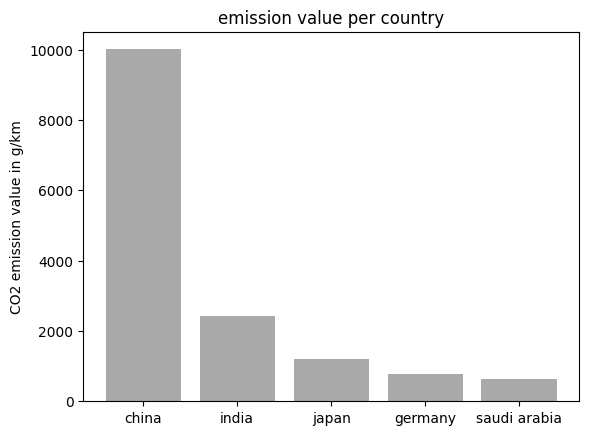

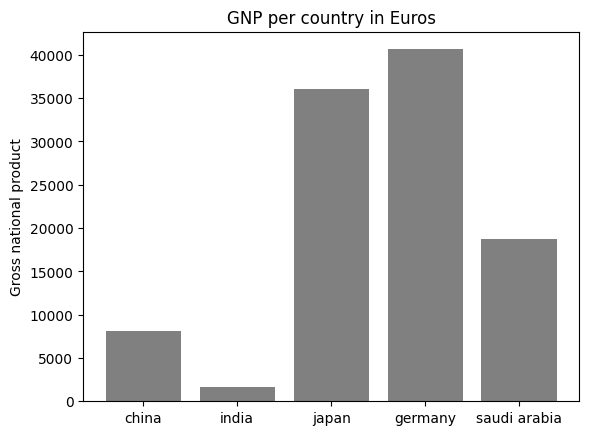

In [9]:
# Making the bar plots per capita sorted by increasing emmission
countries_list = final_df.groupby('country').sum().sort_values(by='emission',ascending = False).index# Making a list of the individual countries and sorting them in total emmission value
emmsion_value_list = final_df.groupby('country').sum().sort_values(by='emission', ascending = False)['emission']  # Making a list of the total emmission value
gnp_per_country= final_df.groupby('country').sum().sort_values(by='emission', ascending = False)['GNP per Capita'] # getting al the GNP per country

countries_list = list(countries_list)
emmsion_value_list = list(emmsion_value_list)
gnp_per_country = list(gnp_per_country)

# Plotting the bar plots.
plt.title("emission value per country")
plt.bar(countries_list[:5],emmsion_value_list[:5],color = "darkgrey")
plt.ylabel("CO2 emission value in g/km")
plt.show()

plt.title("GNP per country in Euros" )
plt.bar(countries_list[:5],gnp_per_country[:5],color = "grey")
plt.ylabel("Gross national product")
plt.show()


The bar graphs depict the amount of CO2 and GDP in that particular year.
This demonstrates that wealthier countries, such as Germany and Japan, emit less CO2 while having a higher GNP. 

____

# Stastistical checks and tests

The merged dataframe can now be used to plot the data and answer the research question, but first we must determine whether the data is normally distributed. To see the distribution, a histogram will be used.
We can then assume a destribution to see if it truly follows this distribution. 

The test that are being conducted:

`Normal distribution test `

`Statistic test`
_____


#### QQplot
The Q-Q plot, also known as the quantile-quantile plot, is a graphical tool used to determine whether a set of data is likely to have come from a theoretical distribution such as a Normal or exponential distribution.

Estimation method: robust
n = 154, mu = 13.76, sigma = 51.04
Expected number of data outside CI: 8


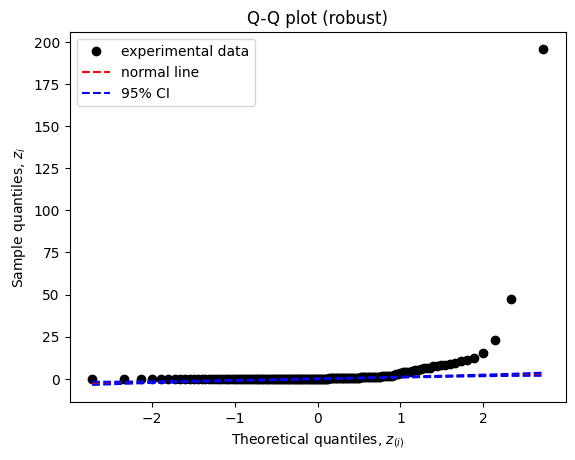

Estimation method: robust
n = 154, mu = 4644, sigma = 8384
Expected number of data outside CI: 8


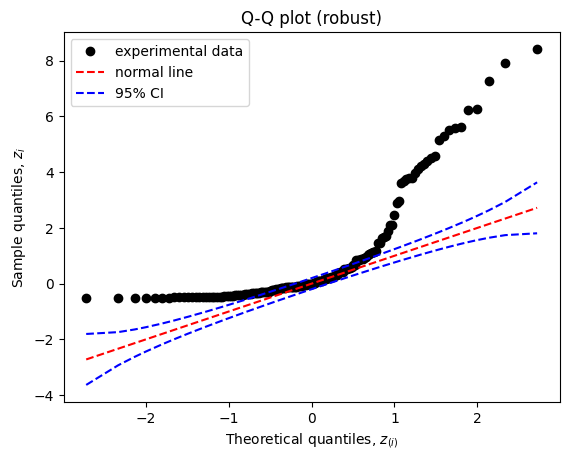

In [10]:
# we can just call the Q_Q_plot function from the pack made by Emile Apole 

sf.DS_Q_Q_Plot(final_df["emission"]) # The plotted of the data 
sf.DS_Q_Q_Plot(final_df["GNP per Capita"]) 


As seen above, the data does not follow a normal distribution.
We should plot a histogram to see what kind of distribution is represented here.
The distribution will be revealed by the histograms.
We will also be able to select a statistical test for the data based on the distribution. 

___

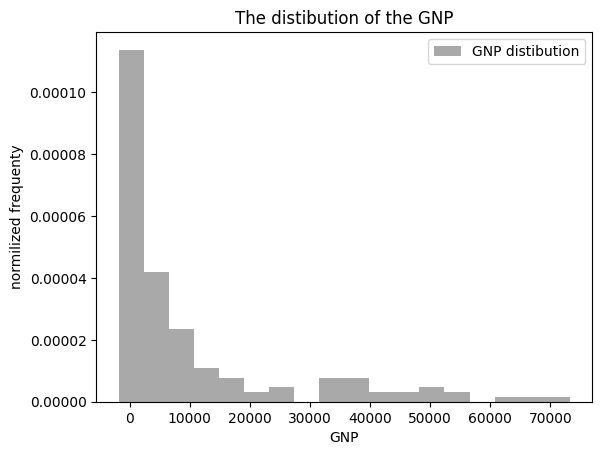

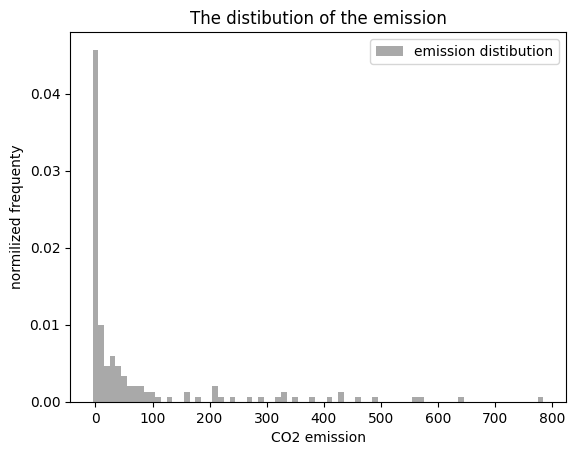

In [11]:
# picking the bins for the histograms. I will use the minimum value and maximum value of the data.
# GNP histogram.
plt.title("The distibution of the GNP")
plt.hist(final_df["GNP per Capita"],density=True,color="darkgrey",bins="auto", label = "GNP distibution",align="left")
plt.xlabel("GNP")
plt.ylabel("normilized frequenty")
plt.legend(loc = "best")
plt.show()


# plot for the emission 
plt.title("The distibution of the emission")
plt.hist(final_df["emission"],density=True,color="darkgrey",bins=np.arange(0,800,10), label = "emission distibution",align="left")
plt.xlabel("CO2 emission")
plt.ylabel("normilized frequenty")
plt.legend(loc = "best")
plt.show()


As shown above the data is not normal distributed. The data follows a positive skewed distribution. in statistics, a positively skewed (or right-skewed) distribution is a type of distribution in which most values are clustered around the left tail of the distribution while the right tail of the distribution is longer. Meaning that a paramatic test is not possible 
for this reason we will be using a non paramatic test called a Spearman Rank Correlation. 
Spearman's rank correlation measures the strength and direction of association between two ranked variables. 
this is wat we want to do for this type of data



-----

#### Spearman rank correlation test

Based on the table that was created earlier, the emmission and GNP do not appear to be correlated.
However, to be certain, a correlation test should be performed.
The test will be performed per capita in the most recent available year.
This will demonstrate whether a higher GNP is associated with a higher emmission value. 

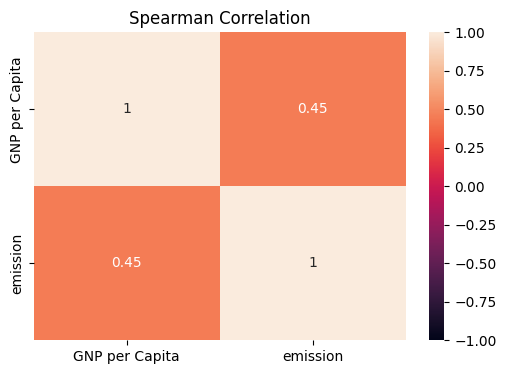

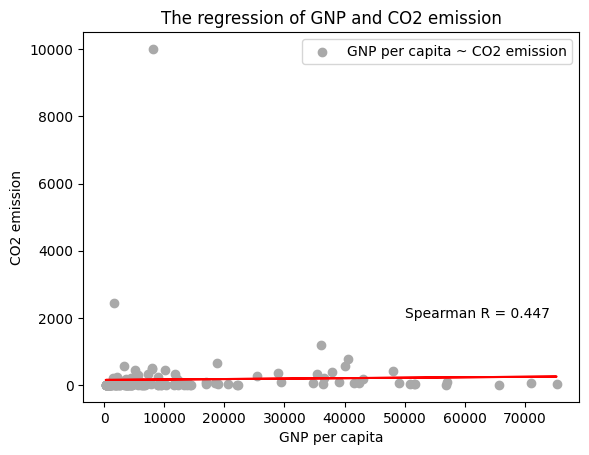

In [12]:
spearman_dataframe = final_df.drop(columns="Year") #  delete the year column from the data frame for the spearman test

spearman = spearman_dataframe.corr(method="spearman",numeric_only=True) # to get the Rho's from the data 

plt.figure(figsize=(6,4))
heatmap = sn.heatmap(spearman, vmin=-1,vmax=1, annot=True) # visualize the Rho's 
plt.title("Spearman Correlation")
plt.show()

# plotting a scatter plot to show correlation
plt.title("The regression of GNP and CO2 emission")
plt.scatter(final_df["GNP per Capita"],final_df["emission"],label = "GNP per capita ~ CO2 emission",color= "darkgrey")
plt.plot(final_df["GNP per Capita"], np.poly1d(np.polyfit(final_df["GNP per Capita"], final_df["emission"], 1))(final_df["GNP per Capita"]), color='red')
plt.xlabel("GNP per capita")
plt.ylabel("CO2 emission")
plt.text(50000, 2000, f'Spearman R = {round(pd.Series(final_df["GNP per Capita"]).corr(final_df["emission"], method="spearman"), 3)}')
plt.legend(loc = "best")
plt.show()






# Conclusion

The test's Rho reveals that the correlation between the two variables (GNP and CO2 emissions) is only 0.447. That is, the correlation strength between the two variables is not very strong. 
This low Rho is due to the fact that the countries with the highest GNP emit the least amount of CO2. In comparison, the countries with the lowest GNP emit a large amount of CO2. The simple explanation is that poor countries lack the technology to produce goods with low CO2 emissions.
and countries such as Germany can do so due to their wealth and technological advantage.
This can be seen within the section   `Barplots`.
 

____